In [1]:
# Import necessary libraries.
import pandas as pd
import openai

# Configure the baseline configuration of the OpenAI library.
openai.api_type = "azure"
openai.api_base = "<YOUR_AOAI_ENDPOINT>"
openai.api_version = "2022-12-01"
openai.api_key = "<YOUR_AOAI_KEY>"

In [2]:
# Load csv data to Pandas dataframe and display the header.
df = pd.read_csv('./data/asos_transform.csv')
df.head()

,Title,Contents,Date
0,I love ASOS,I love ASOS and allCustomer service they are j...,"Dec 14, 2019"
1,Quality customer service,My order was left outside and the school kids ...,"Dec 14, 2019"
2,Helpful and friendly staff.,Helpful and friendly staff.,"Dec 14, 2019"
3,Replied quickly and made sure their…,Replied quickly and made sure their customers ...,"Dec 14, 2019"
4,Helpful customer service officer but problemat...,Rebecca was patient and helpful with my querie...,"Dec 14, 2019"


In [3]:
# Check dataframe information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     2000 non-null   object
 1   Contents  2000 non-null   object
 2   Date      2000 non-null   object
dtypes: object(3)
memory usage: 47.0+ KB


In [4]:
# Select the top 10 rows from the dataframe. It's part of the reviews on 14 Dec 2019.
df_10 = df.head(10)

In [6]:
# Primary functions to interact with AOAI GPT-3 to obtain insights.
review_content_list = []

for index, headers in df_10.iterrows():
    review_content = str(headers["Contents"])
    print("Review Content: {}".format(review_content))
    # Use AOAI GPT-3 to classify the sentiment of the review content.
    response = openai.Completion.create(
      engine="<YOUR_MODEL_DEPLOYMENT_NAME>",
      prompt="Classify the sentiment of the following review content following categories: \
      categories: [Negative, Netural, Positive]\n\nreview content : " + review_content + "\n\nClassified sentiment:",
      max_tokens=10)
    classified_sentiment = response['choices'][0]['text'].replace(" ", "")
    # print("Classified Sentiment of Review Content: {}".format(classified_sentiment))
    print("Sentiment Classified")
    
    # Use AOAI GPT-3 to summarize the review content.
    response2 = openai.Completion.create(
      engine="<YOUR_MODEL_DEPLOYMENT_NAME>",
      prompt="Summarize the following review content in one sentence:" \
      + review_content + "\n\nOne Sentence:",
      max_tokens=100)
    summarized_sentence = response2['choices'][0]['text'].replace("\n","")
    # print("Summarize Sentence from the Review Content: {}".format(summarized_sentence))
    print("Summarize Sentence Generated")
    
    # Use AOAI GPT-3 to summarize 3 keyword based on the review content.
    response3 = openai.Completion.create(
      engine="<YOUR_MODEL_DEPLOYMENT_NAME>",
      prompt="Based on the review content, summarize in 3 keywords:" \
      + review_content + "\n\nKeywords:",
      max_tokens=20)
    summarized_keywords = response3['choices'][0]['text'].replace("\n","").replace(".","")
    # print("Summarize 3 Keywords from the Review Content: {}".format(summarized_keywords))
    print("Summarize Keywords Generated")
    
    # Use AOAI GPT-3 to craft a reply message based on the review content.
    response4 = openai.Completion.create(
      engine="<YOUR_MODEL_DEPLOYMENT_NAME>",
      prompt="Based on the review content, craft a reply message:" \
      + review_content + "\n\nReply Message:",
      max_tokens=100)
    reply_message = response4['choices'][0]['text'].replace("\n","")
    # print("Draft of reply message based on the Review Content: {}".format(reply_message))
    print("Draft of Reply Message Generated")
    
    # Append the insights result into a list.
    review_content_list.append([review_content, classified_sentiment, summarized_sentence, summarized_keywords, \
                                reply_message])

# Convert the list of insights into a Pandas dataframe.
review_content_df = pd.DataFrame(review_content_list, columns=['review_content', 'classified_sentiment', \
                                                               'summarized_sentence', 'summarized_keywords', \
                                                               'reply_message'])

Review Content: I love ASOS and allCustomer service they are just adorable
Sentiment Classified
Summarize Sentence Generated
Summarize Keywords Generated
Draft of Reply Message Generated
Review Content: My order was left outside and the school kids ransacked it, however this was hermes who had left it outside and ASOS refunded me and resolved my issue immediately, Mairi was so kind and helpful. 10/10 customer service.
Sentiment Classified
Summarize Sentence Generated
Summarize Keywords Generated
Draft of Reply Message Generated
Review Content: Helpful and friendly staff.
Sentiment Classified
Summarize Sentence Generated
Summarize Keywords Generated
Draft of Reply Message Generated
Review Content: Replied quickly and made sure their customers were happy
Sentiment Classified
Summarize Sentence Generated
Summarize Keywords Generated
Draft of Reply Message Generated
Review Content: Rebecca was patient and helpful with my queries, though there seems to be some logistic issues with ASOS deli

In [7]:
# Display the result dataframe with the insights from AOAI GPT-3.
review_content_df

,review_content,classified_sentiment,summarized_sentence,summarized_keywords,reply_message
0,I love ASOS and allCustomer service they are j...,Positive,ASOS has great customer service and their pro...,"ASOS, Customer Service, Adorable",Thank you for your kind words about ASOS and ...
1,My order was left outside and the school kids ...,Positive,Mairi provided excellent customer service and ...,"ASOS, Refunded, Helpful",Thank you so much for sharing your great exper...
2,Helpful and friendly staff.,Positive,The staff at this location were helpful and f...,"Helpful, Friendly, Staff",Thank you for leaving us such a positive revi...
3,Replied quickly and made sure their customers ...,Positive,"The business provided fast, satisfactory cust...","Quick response, Customer Satisfaction, Qualit...",Thank you for your kind words! We are committe...
4,Rebecca was patient and helpful with my querie...,Neutral,"Rebecca was very helpful, but there were stil...","ASOS, Delivery, Patience","Hi, thank you for your review. We apologize ..."
5,"Fast, kind, clear answer! Perfect that I love ...",Positive,"ASOS provides excellent, speedy service with ...","Fast, Kind, Clear",Thank you for taking the time to share your ex...
6,It took over 20 minutes to be connected with t...,Negative,The service was poor in comparison to other on...,"Poor Service, Online Chat, Unhelpful",We apologize for the delay and the unhelpful a...
7,Terrible firm. I had such a bad time trying to...,Negative,The terrible service from this firm made cust...,"Terrible, Frustrating, Unreliable",I am sorry you had such a bad experience with ...
8,"very helpful, clear and prompt",Positive,"The service provided was very helpful, clear ...","Helpful, Clear, Prompt",Thank you so much for your kind words! We are...
9,Ordered a Vivienne Westwood which was delivere...,Positive,"Despite initial frustration, ASOS's Donique p...","ASOS, Fast Resolution, Christmas Stress",We apologize that your Vivienne Westwood order...


In [8]:

# Save the result dataframe into a CSV file.
review_content_df.to_csv("./data/analyzed_review_content.csv")

In [9]:
# Concatenate all the review content into a single string.
review_content_string = review_content_df['review_content'].to_string(header=False, index=False)
print(review_content_string)

I love ASOS and allCustomer service they are ju...
My order was left outside and the school kids r...
                       Helpful and friendly staff.
Replied quickly and made sure their customers w...
Rebecca was patient and helpful with my queries...
Fast, kind, clear answer! Perfect that I love A...
It took over 20 minutes to be connected with th...
Terrible firm. I had such a bad time trying to ...
                    very helpful, clear and prompt
Ordered a Vivienne Westwood which was delivered...


In [10]:
# Use AOAI GPT-3 to summarize all the review content.
response5 = openai.Completion.create(
  engine="<YOUR_MODEL_DEPLOYMENT_NAME>",
  prompt="Summarize the following review content in 100 words" + review_content_string + "\n\nSummary:",
  max_tokens=120)

all_review_content_summary = response5['choices'][0]['text'].replace("\n","")
print(all_review_content_summary)

 I had a positive experience ordering from ASOS, as the customer service staff were helpful and friendly. They replied quickly to queries and Rebecca was patient with me. The wait time was long to be connected with them but the outcome was nice and clear. I ordered a Vivienne Westwood product and it was delivered on time. However, someone else had a negative experience with their customer service, claiming it was a terrible firm.


<Axes: ylabel='review_content'>

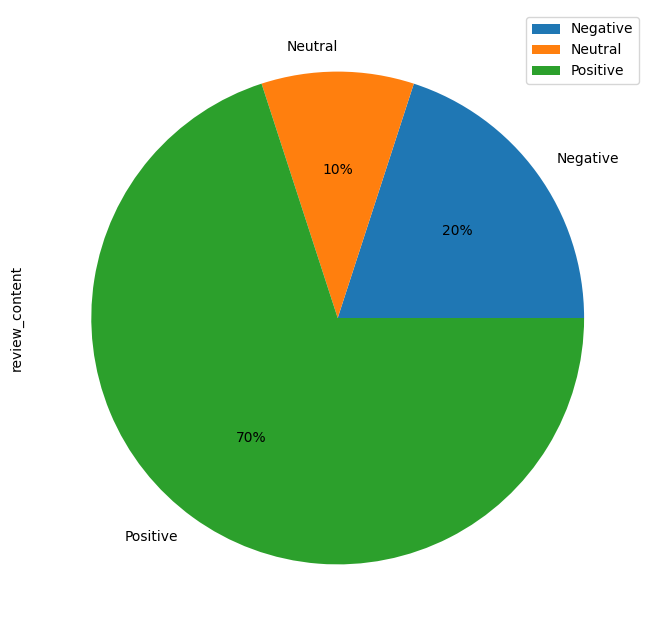

In [11]:
# Visualize the classified sentiment of the review content as a pie chart.
review_content_df.groupby(['classified_sentiment']).count().plot(kind='pie',y='review_content', autopct='%1.0f%%', \
                                                                figsize =(8,8))